In [1]:
#import useful libraries

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


import pickle
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Conv1D, MaxPooling2D, Flatten, Dense, Activation, Dropout


Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')   #Connecting to my Google Drive account

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
pickle_in = open("/content/drive/My Drive/final_x.pickle","rb") #Uploading images in pickle from Drive
X = pickle.load(pickle_in)

pickle_in = open("/content/drive/My Drive/final_y.pickle","rb") #Uploading labels in pickle from Drive
y_lebels = pickle.load(pickle_in)

X = X/255.


y = tf.keras.utils.to_categorical(y_lebels)  #Categorizing the labels for the model

print("Images: {}, dimension: {} x {}, layers: {} ".format(X.shape[0], X.shape[2], X.shape[1], X.shape[3]))

Images: 6986, dimension: 350 x 500, layers: 1 


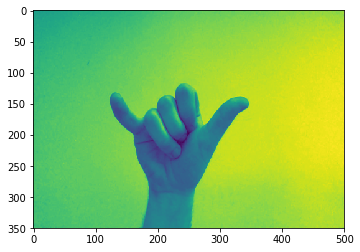

In [4]:
plt.imshow(X[0].reshape(350,500));

In [5]:
model = Sequential() #Neural Network model
#LAYERS
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(500, 350, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=6, activation='softmax'))
#COMPILE
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adadelta(),  
    metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [6]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 498, 348, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 249, 174, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 249, 174, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 247, 172, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 123, 86, 64)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 123, 86, 64)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 676992)           

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 6287 samples, validate on 699 samples
Epoch 1/10
6287/6287 [==============================] - 131s 21ms/step - loss: 11.2361 - acc: 0.2030 - val_loss: 0.3806 - val_acc: 0.8484
Epoch 2/10
6287/6287 [==============================] - 126s 20ms/step - loss: 0.0424 - acc: 0.9905 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 3/10
6287/6287 [==============================] - 126s 20ms/step - loss: 0.0084 - acc: 0.9987 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 4/10
6287/6287 [==============================] - 126s 20ms/step - loss: 0.0077 - acc: 0.9989 - val_loss: 4.1147e-05 - val_acc: 1.0000
Epoch 5/10
6287/6287 [==============================] - 126s 20ms/step - loss: 0.0053 - acc: 0.9997 - val_loss: 8.0911e-06 - val_acc: 1.0000
Epoch 6/10
6287/6287 [==============================] - 126s 20ms/step - loss: 0.0053 - acc: 0.9997 - val_loss: 1.6788e-05 - val_acc: 1.0000
Epoch 7/10
6287/6287 [==

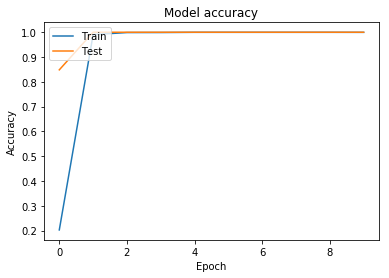

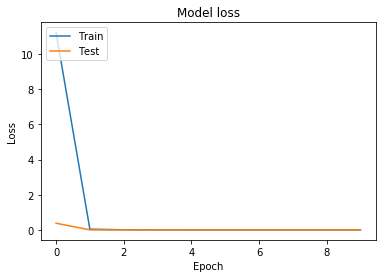

In [7]:
history = model.fit(X, y, validation_split=0.1, epochs=10, batch_size=16, verbose=1)  #Model fit with 0.1 of validation split

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
print("Model metrics names: {},{}".format(model.metrics_names[0],model.metrics_names[1]))
model.evaluate(x=X, y=y, batch_size=None, verbose=1, sample_weight=None, steps=None)


Model metrics names: loss,acc
6986/6986 [==============================] - 27s 4ms/step


[0.004615040920913675, 0.9997137131405669]

In [0]:
model.save('modelFinalProject.h5')  #save model

['loss', 'acc']